<h1>Creating a climatology for the AIRS data</h1>
<h4>Momentum Flux (mfx) at 30hpa for Months October-March across are 2002, 2005, 2011, 2012, 2014, 2015, 2016, 2017, 2019, 2020, 2021 and 2022</h4>
<p> To better understand the atmospheric processes and variability, it is essential to create a climatology of the relevant data. For the AIRS (Atmospheric Infrared Sounder) dataset, a climatology can be developed by averaging the data over several years, considering the seasonal and interannual variations.

One important consideration is the impact of seasonal variations on the vortex. To address this, a subtraction method can be employed. For instance, in the case of an SSW (Sudden Stratospheric Warming) event, the days leading up to the central warming date in the current year's time series and the corresponding days before the date in the climatology time series are subtracted. This step helps account for seasonal variations in the vortex.

Overall, creating a climatology for the AIRS data can provide valuable insights into the atmospheric processes and improve our ability to model and predict weather patterns.</p>

In [1]:
import os
import numpy as np
from datetime import datetime, timedelta
from classes.matlab_reader import matlab_reader
from classes.grid_funcs import map_grid,dataset,data_wizard
from datetime import datetime
import matplotlib.pyplot as plt


In [1]:

# Define the path to the directory containing the files
directory = '/Users/joaojesus/Desktop/final_year_proj/processed_airs_sftp/40_km_grid/30km/mfx'

# Define the years and months to include
# years = [2002, 2005, 2011, 2012, 2014, 2015, 2016, 2017, 2019, 2020, 2021, 2022]
years = [2002, 2005, 2011, 2012, 2014, 2015]
months = ['10', '11', '12', '01', '02', '03']

# Loop through the files and calculate the daily averages
daily_averages = {}
for month in months:
    for day in range(1, 32):
        date_str = f'{month}-{day:02d}'
        daily_data = []
        for year in years:
            filename = f'{year}-{date_str}_mfx.npz'
            file_path = os.path.join(directory, filename)
            if os.path.exists(file_path):
                data = np.load(file_path)['arr_0']
                daily_data.append(data)
        if daily_data:
            daily_average = np.nanmean(daily_data, axis=0)
            daily_averages[date_str] = daily_average

# Save the daily averages to a file
for date_str, daily_average in daily_averages.items():
    np.savez(f'climatology/airs/30km/mfx/{date_str}_daily_average.npz', daily_average)


/var/folders/p6/325r0tsd2cd1jddpt9nd70hm0000gn/T/ipykernel_64333/4294738743.py:26: RuntimeWarning: Mean of empty slice
  daily_average = np.nanmean(daily_data, axis=0)


In [3]:
np.nanmean(daily_average)

-0.00017582962012326793

In [26]:
# Calculate the daily averages and save to a file
for date, values in daily_averages.items():
    daily_average = np.nanmean(values, axis=0)
    np.savez(f'climatology/airs/30km/mfx/{date}_daily_average.npz', daily_average)

/var/folders/p6/325r0tsd2cd1jddpt9nd70hm0000gn/T/ipykernel_12067/213814984.py:3: RuntimeWarning: Mean of empty slice
  daily_average = np.nanmean(values, axis=0)


In [17]:
# load an example daily average file
data = np.load('climatology/airs/30km/mfx/2012-10-01_daily_average.npz')['arr_0']

In [18]:
np.nanmean(data)

def get_day_array(date_string = "2018-02-11", days = 9):
    date = datetime.strptime(date_string, "%Y-%m-%d")
    dates = []
    for i in range(days):
        previous_date = date - timedelta(days=i+1)
        dates.append(previous_date.strftime("%Y-%m-%d")) 
    dates.reverse()
    return dates

In [36]:
days = 8
dates = get_day_array(date_string="2009-01-26",days=days)

data_dict = {}
for i in range(days):
    data = np.load(f'climatology/airs/30km/mfx/{dates[i]}_daily_average.npz')['arr_0']
    data_climatological_mean = np.load(f'climatology/airs/30km/mfx/{dates[i][5:]}_daily_average.npz')['arr_0']
    perturbation = data - data_climatological_mean
    data_dict[f"data_{i+1}"] = data


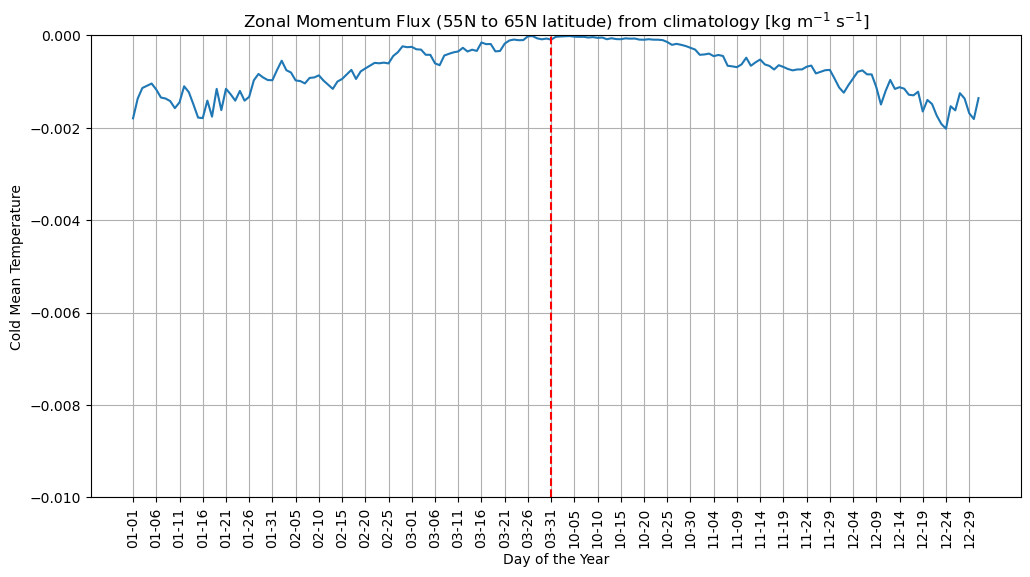

In [26]:
file_path = f'climatology/airs/30km/mfx/'
files = os.listdir(file_path)
files.sort()

grid = map_grid(grid_size='40', source='airs')
wizard = data_wizard()

cos_lat = np.cos(np.deg2rad(grid.nh_lat))
select_area_indexer = grid.select_area_indexer(min_lat= 55,max_lat= 65,min_lon= -180,max_lon= 180)


means = []
days = []
i=1
for file in files:
    if file.endswith(".npz"):
        data = np.load(f'climatology/airs/30km/mfx/{file}')['arr_0'] * cos_lat
        data_filtered = wizard.data_filtering(select_area_indexer = select_area_indexer ,data = data) 
        mean = np.nanmean(data_filtered)
        means.append(mean)
        days.append(f'{file[:5]}')
        i = i + 1
        
plt.figure(figsize=(12, 6))
plt.plot(days, means)
plt.xlabel('Day of the Year')
plt.ylabel('Cold Mean Temperature')
plt.xticks(days[::5], rotation = 90)
plt.ylim([-0.010,0])
plt.axvline(x='03-31', color='r', linestyle='--', label='Discontinuation')

plt.title('Zonal Momentum Flux (55N to 65N latitude) from climatology [kg m$^{-1}$ s$^{-1}$]')
plt.grid()


In [19]:
days


['01-01',
 '01-02',
 '01-03',
 '01-04',
 '01-05',
 '01-06',
 '01-07',
 '01-08',
 '01-09',
 '01-10',
 '01-11',
 '01-12',
 '01-13',
 '01-14',
 '01-15',
 '01-16',
 '01-17',
 '01-18',
 '01-19',
 '01-20',
 '01-21',
 '01-22',
 '01-23',
 '01-24',
 '01-25',
 '01-26',
 '01-27',
 '01-28',
 '01-29',
 '01-30',
 '01-31',
 '02-01',
 '02-02',
 '02-03',
 '02-04',
 '02-05',
 '02-06',
 '02-07',
 '02-08',
 '02-09',
 '02-10',
 '02-11',
 '02-12',
 '02-13',
 '02-14',
 '02-15',
 '02-16',
 '02-17',
 '02-18',
 '02-19',
 '02-20',
 '02-21',
 '02-22',
 '02-23',
 '02-24',
 '02-25',
 '02-26',
 '02-27',
 '02-28',
 '02-29',
 '03-01',
 '03-02',
 '03-03',
 '03-04',
 '03-05',
 '03-06',
 '03-07',
 '03-08',
 '03-09',
 '03-10',
 '03-11',
 '03-12',
 '03-13',
 '03-14',
 '03-15',
 '03-16',
 '03-17',
 '03-18',
 '03-19',
 '03-20',
 '03-21',
 '03-22',
 '03-23',
 '03-24',
 '03-25',
 '03-26',
 '03-27',
 '03-28',
 '03-29',
 '03-30',
 '03-31',
 '10-01',
 '10-02',
 '10-03',
 '10-04',
 '10-05',
 '10-06',
 '10-07',
 '10-08',
 '10-09',
